In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
os.chdir("/content/drive/MyDrive/Works/Bitirme")

In [ ]:
data_file = "Data/Veriseti_Ortaokullar_GONDERILEN.xlsx"
data_original = pd.read_excel(data_file)
df_1 = data_original.copy()
df_1 = df_1.drop(columns=["okuladi", "okulno"])
df_1.head()

,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ort5,ort6,ort7
0,1,0,0,0,0,0,0,5,4,1,0,3,3,0,1,1,5,2,2,2,2,0,0,0,85.5956,88.0247,91.0988
1,1,0,0,0,0,0,0,2,4,1,0,2,3,0,1,3,3,3,2,2,2,0,0,1,96.3081,94.9244,97.2963
2,1,0,0,0,0,0,0,4,2,1,0,3,3,0,1,2,1,0,4,3,2,1,0,1,93.4270,91.3742,89.7531
3,1,0,0,0,0,0,0,2,4,1,0,4,4,0,1,4,3,3,1,4,4,1,1,1,64.5563,64.8812,61.3426
4,1,0,0,0,0,0,0,2,2,1,0,4,2,1,1,4,4,2,1,4,1,0,1,0,91.8089,93.9298,93.3457


In [ ]:
df_1.iloc[:, -3:] = df_1.iloc[:, -3:].astype("int64")
df_1.dtypes

cinsiyet           int64
Asag               int64
Bsag               int64
Aoz                int64
Boz                int64
ABayri             int64
Abirlikte          int64
Aogrenim           int64
Bogrenim           int64
Acalisma           int64
Bcalisma           int64
gelir              int64
kardes             int64
oda                int64
hastalik           int64
uyku               int64
internet           int64
televizyon         int64
eba_tv             int64
oyun               int64
ders_calisma       int64
okul_dyk           int64
ozel_kurs          int64
sosyal_kulturel    int64
ort5               int64
ort6               int64
ort7               int64
dtype: object

In [ ]:
def sifir_bir_duzelt(degisken):
  for i in df_1[degisken].index:
    if df_1[degisken][i] ==0:
      df_1[degisken][i] = 1
    elif df_1[degisken][i]==1:
      df_1[degisken][i]=0

In [ ]:
sifir_bir_duzelt("Asag")
sifir_bir_duzelt("Bsag")
sifir_bir_duzelt("Aoz")
sifir_bir_duzelt("Boz")
sifir_bir_duzelt("ABayri")
sifir_bir_duzelt("Abirlikte")
sifir_bir_duzelt("Acalisma")
sifir_bir_duzelt("Bcalisma")
sifir_bir_duzelt("oda")
sifir_bir_duzelt("hastalik")
sifir_bir_duzelt("okul_dyk")
sifir_bir_duzelt("ozel_kurs")

In [ ]:
df_1.head()

,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ort5,ort6,ort7
0,1,1,1,1,1,1,1,5,4,0,1,3,3,1,0,1,5,2,2,2,2,1,1,0,85,88,91
1,1,1,1,1,1,1,1,2,4,0,1,2,3,1,0,3,3,3,2,2,2,1,1,1,96,94,97
2,1,1,1,1,1,1,1,4,2,0,1,3,3,1,0,2,1,0,4,3,2,0,1,1,93,91,89
3,1,1,1,1,1,1,1,2,4,0,1,4,4,1,0,4,3,3,1,4,4,0,0,1,64,64,61
4,1,1,1,1,1,1,1,2,2,0,1,4,2,0,0,4,4,2,1,4,1,1,0,0,91,93,93


In [ ]:
data_file_tutum = "Data/Ortaokul_TutumOlcegi.xlsx"
data_original_tutum = pd.read_excel(data_file_tutum)
df_tutum = data_original_tutum.copy()
df_tutum.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,ALGILANAN OKUL YAŞANTILARI ÖLÇEĞİ,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,ÖZ DÜZENLEME ÖLÇEĞİ,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,AYDA SINAV KAYGISI ÖLÇEĞİ,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Öğrenci Notları,Unnamed: 72,Unnamed: 73
0,Okul Adı,Okul No,Cinsiyet,Anne sağ mı?,Baba sağ mı?,Anne öz mü?,Baba öz mü?,Anne-Baba birlikte mi?,Aile ile birlikte mi yaşıyorsunuz?,Anne öğrenim düzeyi,Baba öğrenim düzeyi,Anne çalışıyor mu?,Baba çalışıyor mu?,Gelir düzeyiniz ortalama aylık olarak nedir?,Kendiniz dahil aynı ailede yaşayan toplam kard...,Kendinize ait odanız var mı?,Kronik ya da kalıtsal bir hastalığınız var mı?,Günde kaç saat uyursunuz (ortalama olarak) ?,Günde kaç saat ders dışı internet kullanırsını...,Günlük ortalama olarak ne sıklıkta televizyon ...,EBA TV ve benzeri akademik ders içerikli telev...,İnternet haricinde günlük ortalama olarak ne s...,Günlük ortalama olarak kaç saat ders çalışırsı...,Okulda destekleme ve yetiştirme kursu alıyor m...,Okul DYK haricinde özel ders ya da kurs alıyor...,"Aşağıdaki Sosyal, Kültürel ve Sportif faaliyet...",Öğretmenim öğrencilerine onların akademik perf...,Okulda alınan kararlar genellikle öğrenmek içi...,Öğretmenler öğrencilerin düzenli bir şekilde ö...,Okulum öğrencilerin öğrenmesine değer verir.,Okulla ilgili işlerimi yapabilecek yeteneğim o...,Okulda edindiğim deneyimlerin beni yetişkinliğ...,"Okulda şu ana kadar yaşadıklarımdan, edindiğim...",Okula karşı olumlu bir tutuma sahibim.,Okulda yeni bir şeyler öğrenmenin zorluğunu se...,Şu ana kadar okuldan birçok şey kazandığımı d...,Bu okulda öğrenci olmaktan gurur duyuyorum.,Bu okula ait olduğumu hissediyorum.,Okula gelmekten zevk alıyorum.,Okulumdaki öğretmenlerimle anlamlı ilişkilerim...,Eğer istersem en zor konuları bile rahatlıkla ...,Belirlediğim hedefler doğrultusunda çalışmalar...,Yeni bir konuyu rahatlıkla öğrenebilirim.,Bir konuyu anlamadığım zaman arkadaşlarımdan y...,Bir konuyu öğrenirken yenilikleri kolaylıkla f...,"Bir şeyler istemediğim şekilde giderse, bu dur...",Hatalarımdan öğrenebilirim.,"Bir konuyu öğrenirken, o dersteki notlarıma ba...","Bir konuyu öğrenirken, farklı yollar bulmaya ç...",Başarısız olduğumda çalışma yöntemimi değiştir...,Hedeflerime doğru ilerleme sürecimi takip edeb...,Bir konuyu öğrenirken karşılaştığım problemler...,Bir konuyu öğrenirken yapmış olduğum plana uya...,"Bir konuyu öğrenirken, başka yöntemler kullanm...",Çoğu zaman bir konuyu öğrenirken neler yaptığı...,Yanlış öğrendiğimi fark ettiğim şeyi değiştirm...,"Sınav yaklaştıkça heyecandan, ya bildiklerimi ...","Sınav günü yaklaştıkça kaydırma yaparsam, gerg...","Sınavda kötü sonuç alırsam, çevremdekilerin te...","Sınav yaklaştıkça daha çok çalışsaydım, daha f...","Sınavım kötü geçerse ailem ne der (sitem etme,...",Sınav günü yaklaştıkça çözemediğim konu/sorula...,Sınavda kötü sonuç alırsam sevdiğim insanların...,Sınav esnasında fizyolojik sorunlar (kalp atış...,Öncesinde çok çalışmama rağmen sınav günü hazı...,Başarısız olursam olacakları (ailenin üzülmesi...,Sınava fiziken bitkin girmek (stresten uyuyama...,Başarısız olacağım endişesi sınav günü üzerimd...,Sınavda başarılı olamazsam çevreden alacağım t...,"Sınav yaklaştıkça, başka bir şey düşünemediğim...",Ailem ve arkadaşlarım için sınavdaki başarı ve...,ort5,ort6,ort7
1,OKUL1,okulno0001,Erkek,Evet,Evet,Evet

In [ ]:
df_tutum_columns = list(df_tutum.loc[0,:])
df_tutum_columns

['Okul Adı',
 'Okul No',
 'Cinsiyet',
 'Anne sağ mı?',
 'Baba sağ mı?',
 'Anne öz mü?',
 'Baba öz mü?',
 'Anne-Baba birlikte mi?',
 'Aile ile birlikte mi yaşıyorsunuz?',
 'Anne öğrenim düzeyi',
 'Baba öğrenim düzeyi',
 'Anne çalışıyor mu?',
 'Baba çalışıyor mu?',
 'Gelir düzeyiniz ortalama aylık olarak nedir?',
 'Kendiniz dahil aynı ailede yaşayan toplam kardeş sayısı',
 'Kendinize ait odanız var mı?',
 'Kronik ya da kalıtsal bir hastalığınız var mı?',
 'Günde kaç saat uyursunuz (ortalama olarak) ?',
 'Günde kaç saat ders dışı internet kullanırsınız (ortalama olarak)?',
 'Günlük ortalama olarak ne sıklıkta televizyon izlersiniz?',
 'EBA TV ve benzeri akademik ders içerikli televizyon yayınlarını ne sıklıkta takip edersiniz?',
 'İnternet haricinde günlük ortalama olarak ne sıklıkta oyun oynarsınız?',
 'Günlük ortalama olarak kaç saat ders çalışırsınız?',
 'Okulda destekleme ve yetiştirme kursu alıyor musunuz?',
 'Okul DYK haricinde özel ders ya da kurs alıyor musunuz?',
 'Aşağıdaki Sosy

In [ ]:
df_tutum.columns = df_tutum_columns

In [ ]:
df_tutum.drop(index=0, inplace=True)
df_tutum.head()

,Okul Adı,Okul No,Cinsiyet,Anne sağ mı?,Baba sağ mı?,Anne öz mü?,Baba öz mü?,Anne-Baba birlikte mi?,Aile ile birlikte mi yaşıyorsunuz?,Anne öğrenim düzeyi,Baba öğrenim düzeyi,Anne çalışıyor mu?,Baba çalışıyor mu?,Gelir düzeyiniz ortalama aylık olarak nedir?,Kendiniz dahil aynı ailede yaşayan toplam kardeş sayısı,Kendinize ait odanız var mı?,Kronik ya da kalıtsal bir hastalığınız var mı?,Günde kaç saat uyursunuz (ortalama olarak) ?,Günde kaç saat ders dışı internet kullanırsınız (ortalama olarak)?,Günlük ortalama olarak ne sıklıkta televizyon izlersiniz?,EBA TV ve benzeri akademik ders içerikli televizyon yayınlarını ne sıklıkta takip edersiniz?,İnternet haricinde günlük ortalama olarak ne sıklıkta oyun oynarsınız?,Günlük ortalama olarak kaç saat ders çalışırsınız?,Okulda destekleme ve yetiştirme kursu alıyor musunuz?,Okul DYK haricinde özel ders ya da kurs alıyor musunuz?,"Aşağıdaki Sosyal, Kültürel ve Sportif faaliyetlerden hangisi ya da hangilerini düzenli olarak yaparsınız?",Öğretmenim öğrencilerine onların akademik performansı ile ilgili yararlı geri bildirimler verir.,Okulda alınan kararlar genellikle öğrenmek için neyin en iyi olacağına odaklanır.,Öğretmenler öğrencilerin düzenli bir şekilde öğrenip öğrenmediğini denetler.,Okulum öğrencilerin öğrenmesine değer verir.,Okulla ilgili işlerimi yapabilecek yeteneğim olduğuna güveniyorum.,Okulda edindiğim deneyimlerin beni yetişkinliğe iyi bir şekilde hazırladığını hissediyorum.,"Okulda şu ana kadar yaşadıklarımdan, edindiğim deneyimlerden zevk aldım.",Okula karşı olumlu bir tutuma sahibim.,Okulda yeni bir şeyler öğrenmenin zorluğunu seviyorum.,Şu ana kadar okuldan birçok şey kazandığımı düşünüyorum.,Bu okulda öğrenci olmaktan gurur duyuyorum.,Bu okula ait olduğumu hissediyorum.,Okula gelmekten zevk alıyorum.,Okulumdaki öğretmenlerimle anlamlı ilişkilerim var.,Eğer istersem en zor konuları bile rahatlıkla öğrenebilirim.,Belirlediğim hedefler doğrultusunda çalışmalarımı yapabilirim.,Yeni bir konuyu rahatlıkla öğrenebilirim.,Bir konuyu anlamadığım zaman arkadaşlarımdan yardım isterim.,Bir konuyu öğrenirken yenilikleri kolaylıkla fark edebilirim.,"Bir şeyler istemediğim şekilde giderse, bu durum beni rahatsız eder.",Hatalarımdan öğrenebilirim.,"Bir konuyu öğrenirken, o dersteki notlarıma bakarak başarımı sorgularım.","Bir konuyu öğrenirken, farklı yollar bulmaya çalışırım.",Başarısız olduğumda çalışma yöntemimi değiştiririm.,Hedeflerime doğru ilerleme sürecimi takip edebilirim.,Bir konuyu öğrenirken karşılaştığım problemlerin çözümü için farklı yollar geliştiririm.,Bir konuyu öğrenirken yapmış olduğum plana uyarım.,"Bir konuyu öğrenirken, başka yöntemler kullanmaya çalışırım.",Çoğu zaman bir konuyu öğrenirken neler yaptığıma dikkat ederim.,Yanlış öğrendiğimi fark ettiğim şeyi değiştirmek için birçok farklı yolu deneyebilirim.,"Sınav yaklaştıkça heyecandan, ya bildiklerimi karıştırırsam endişesi yaşarım.","Sınav günü yaklaştıkça kaydırma yaparsam, gerginlikten bildiklerimi karıştırırsam gibi düşünceler zihnimi kurcalıyor.","Sınavda kötü sonuç alırsam, çevremdekilerin tepkisi ne olur vb. tarzı endişeler zihnimi yorar.","Sınav yaklaştıkça daha çok çalışsaydım, daha farklı hazırlansaydım, ya başaramazsam tarzı kuruntularım artar.","Sınavım kötü geçerse ailem ne der (sitem etme, kızma, kıyaslama, suçlama, ayıplama) tarzı endişeler taşımam.",Sınav günü yaklaştıkça çözemediğim konu/soruların artmasıyla sınava ilişkin endişelerim artar.,Sınavda kötü sonuç alırsam sevdiğim insanların gözünde değersizleşeceğim düşüncesi beni yorar.,"Sınav esnasında fizyolojik sorunlar (kalp atışlarının hızlanması, baş ağrısı, ellerin buz kesmesi, terleme vb. gibi) yaşarım.",Öncesinde çok çalışmama rağmen sınav günü hazır olduğuma kendimi ikna edemem.,"Başarısız olursam olacakları (ailenin üzülmesi, başkaları hayatına yön verirken yerinde saymak, geride kalmak) düşünmek zihnimi yorar.","Sınava fiziken bitkin girmek (stresten uyuyamamak, yorgun, bitkin, gergin olmak) sınav günü moralimi alt üst eder.",Başar

In [ ]:
df_aoy = df_tutum.iloc[:, 26:40] #algılanan okul yaşantıları ölçeği
df_aoy.head()

,Öğretmenim öğrencilerine onların akademik performansı ile ilgili yararlı geri bildirimler verir.,Okulda alınan kararlar genellikle öğrenmek için neyin en iyi olacağına odaklanır.,Öğretmenler öğrencilerin düzenli bir şekilde öğrenip öğrenmediğini denetler.,Okulum öğrencilerin öğrenmesine değer verir.,Okulla ilgili işlerimi yapabilecek yeteneğim olduğuna güveniyorum.,Okulda edindiğim deneyimlerin beni yetişkinliğe iyi bir şekilde hazırladığını hissediyorum.,"Okulda şu ana kadar yaşadıklarımdan, edindiğim deneyimlerden zevk aldım.",Okula karşı olumlu bir tutuma sahibim.,Okulda yeni bir şeyler öğrenmenin zorluğunu seviyorum.,Şu ana kadar okuldan birçok şey kazandığımı düşünüyorum.,Bu okulda öğrenci olmaktan gurur duyuyorum.,Bu okula ait olduğumu hissediyorum.,Okula gelmekten zevk alıyorum.,Okulumdaki öğretmenlerimle anlamlı ilişkilerim var.
1,4,5,4,5,5,3,2,4,5,5,5,4,5,5
2,5,3,5,5,5,3,5,5,5,5,5,3,4,5
3,5,3,5,4,3,4,3,3,3,3,5,5,4,3
4,4,4,3,5,4,4,4,5,4,1,5,5,5,4
5,4,4,4,4,5,5,4,3,3,4,4,3,2,4


In [ ]:
df_odo = df_tutum.iloc[:, 40:56] #öz düzenleme ölçeği
df_odo.head()

,Eğer istersem en zor konuları bile rahatlıkla öğrenebilirim.,Belirlediğim hedefler doğrultusunda çalışmalarımı yapabilirim.,Yeni bir konuyu rahatlıkla öğrenebilirim.,Bir konuyu anlamadığım zaman arkadaşlarımdan yardım isterim.,Bir konuyu öğrenirken yenilikleri kolaylıkla fark edebilirim.,"Bir şeyler istemediğim şekilde giderse, bu durum beni rahatsız eder.",Hatalarımdan öğrenebilirim.,"Bir konuyu öğrenirken, o dersteki notlarıma bakarak başarımı sorgularım.","Bir konuyu öğrenirken, farklı yollar bulmaya çalışırım.",Başarısız olduğumda çalışma yöntemimi değiştiririm.,Hedeflerime doğru ilerleme sürecimi takip edebilirim.,Bir konuyu öğrenirken karşılaştığım problemlerin çözümü için farklı yollar geliştiririm.,Bir konuyu öğrenirken yapmış olduğum plana uyarım.,"Bir konuyu öğrenirken, başka yöntemler kullanmaya çalışırım.",Çoğu zaman bir konuyu öğrenirken neler yaptığıma dikkat ederim.,Yanlış öğrendiğimi fark ettiğim şeyi değiştirmek için birçok farklı yolu deneyebilirim.
1,5,2,4,2,5,5,3,4,5,4,5,4,2,4,5,4
2,5,4,3,2,5,5,4,5,3,2,1,1,5,2,2,2
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,4,5,5,4,4,4,4,4,5,5,4,4,5,4,4,4
5,4,5,3,2,4,5,4,5,4,3,4,5,4,4,4,5


In [ ]:
df_ako = df_tutum.iloc[:, 56:71] #ayda sınav kaygısı ölçeği
df_ako.head()

,"Sınav yaklaştıkça heyecandan, ya bildiklerimi karıştırırsam endişesi yaşarım.","Sınav günü yaklaştıkça kaydırma yaparsam, gerginlikten bildiklerimi karıştırırsam gibi düşünceler zihnimi kurcalıyor.","Sınavda kötü sonuç alırsam, çevremdekilerin tepkisi ne olur vb. tarzı endişeler zihnimi yorar.","Sınav yaklaştıkça daha çok çalışsaydım, daha farklı hazırlansaydım, ya başaramazsam tarzı kuruntularım artar.","Sınavım kötü geçerse ailem ne der (sitem etme, kızma, kıyaslama, suçlama, ayıplama) tarzı endişeler taşımam.",Sınav günü yaklaştıkça çözemediğim konu/soruların artmasıyla sınava ilişkin endişelerim artar.,Sınavda kötü sonuç alırsam sevdiğim insanların gözünde değersizleşeceğim düşüncesi beni yorar.,"Sınav esnasında fizyolojik sorunlar (kalp atışlarının hızlanması, baş ağrısı, ellerin buz kesmesi, terleme vb. gibi) yaşarım.",Öncesinde çok çalışmama rağmen sınav günü hazır olduğuma kendimi ikna edemem.,"Başarısız olursam olacakları (ailenin üzülmesi, başkaları hayatına yön verirken yerinde saymak, geride kalmak) düşünmek zihnimi yorar.","Sınava fiziken bitkin girmek (stresten uyuyamamak, yorgun, bitkin, gergin olmak) sınav günü moralimi alt üst eder.",Başarısız olacağım endişesi sınav günü üzerimde büyük bir baskı oluşturur.,Sınavda başarılı olamazsam çevreden alacağım tepkileri düşünmek bile istemiyorum.,"Sınav yaklaştıkça, başka bir şey düşünemediğim için kaygılarım gittikçe artar.",Ailem ve arkadaşlarım için sınavdaki başarı veya başarısızlığım çok anlam ifade etmez.
1,5,4,5,4,2,4,5,4,5,5,4,5,2,2,1
2,4,3,4,4,4,2,1,1,4,1,1,4,1,2,1
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,3,2,3,3,2,4,4,2,2,2,2,3,2,2,2
5,3,2,2,5,4,3,2,2,3,3,4,4,2,4,3


In [ ]:
df_aoy_mean = pd.DataFrame(df_aoy.mean(axis=1), columns=["aoy"]) #algılanan okul yaşantıları ölçeği ortalaması

In [ ]:
df_aoy_mean = df_aoy_mean.reset_index()
df_aoy_mean = df_aoy_mean.iloc[:, -1:]
df_aoy_mean

,aoy
0,4.357143
1,4.500000
2,3.785714
3,4.071429
4,3.785714
...,...
1175,5.000000
1176,3.428571
1177,4.500000
1178,3.928571


In [ ]:
df_odo_mean = pd.DataFrame(df_odo.mean(axis=1), columns=["odo"]) #öz düzenleme ölçeği

In [ ]:
df_odo_mean = df_odo_mean.reset_index()
df_odo_mean = df_odo_mean.iloc[:, -1:]
df_odo_mean

,odo
0,3.9375
1,3.1875
2,3.0000
3,4.3125
4,4.0625
...,...
1175,4.8750
1176,4.0625
1177,4.4375
1178,3.7500


In [ ]:
df_ako_mean = pd.DataFrame(df_ako.mean(axis=1), columns=["ako"]) #ayda sınav kaygısı ölçeği

In [ ]:
df_ako_mean = df_ako_mean.reset_index()
df_ako_mean = df_ako_mean.iloc[:, -1:]
df_ako_mean

,ako
0,3.800000
1,2.466667
2,3.000000
3,2.533333
4,3.066667
...,...
1175,3.666667
1176,4.200000
1177,4.133333
1178,3.533333


`df_aoy_mean`: algılanan okul yaşantıları ölçeği ortalaması  
`df_odo_mean`: öz düzenleme ölçeği ortalaması  
`df_ako_mean`: ayda sınav kaygısı ölçeği ortalaması

 dataframe'lerinde tutum ölçeklerinin ortalamaları saklanmaktadır.

In [ ]:
df_aoy_mean

,aoy
0,4.357143
1,4.500000
2,3.785714
3,4.071429
4,3.785714
...,...
1175,5.000000
1176,3.428571
1177,4.500000
1178,3.928571


In [ ]:
df_total = df_1.join([df_aoy_mean, df_odo_mean, df_ako_mean])

In [ ]:
df_total

,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ort5,ort6,ort7,aoy,odo,ako
0,1,1,1,1,1,1,1,5,4,0,1,3,3,1,0,1,5,2,2,2,2,1,1,0,85,88,91,4.357143,3.9375,3.800000
1,1,1,1,1,1,1,1,2,4,0,1,2,3,1,0,3,3,3,2,2,2,1,1,1,96,94,97,4.500000,3.1875,2.466667
2,1,1,1,1,1,1,1,4,2,0,1,3,3,1,0,2,1,0,4,3,2,0,1,1,93,91,89,3.785714,3.0000,3.000000
3,1,1,1,1,1,1,1,2,4,0,1,4,4,1,0,4,3,3,1,4,4,0,0,1,64,64,61,4.071429,4.3125,2.533333
4,1,1,1,1,1,1,1,2,2,0,1,4,2,0,0,4,4,2,1,4,1,1,0,0,91,93,93,3.785714,4.0625,3.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,0,1,1,1,1,1,1,2,4,0,1,3,3,0,0,3,1,2,4,1,3,1,0,1,97,95,95,5.000000,4.8750,3.666667
1176,1,1,1,1,1,1,1,4,3,0,1,3,3,0,0,4,2,3,3,2,4,1,0,1,89,85,87,3.428571,4.0625,4.200000
1177,0,1,1,1,1,1,1,2,3,0,1,3,3,1,0,3,3,1,1,1,3,0,0,1,98,98,95,4.500000,4.4375,4.133333
1178,1,1,1,1,1,1,1,4,3,0,1,2,4,1,0,3,1,1,3,1,3,1,0,0,94,92,95,3.928571,3.7500,3.533333


## Regresyon Analizi

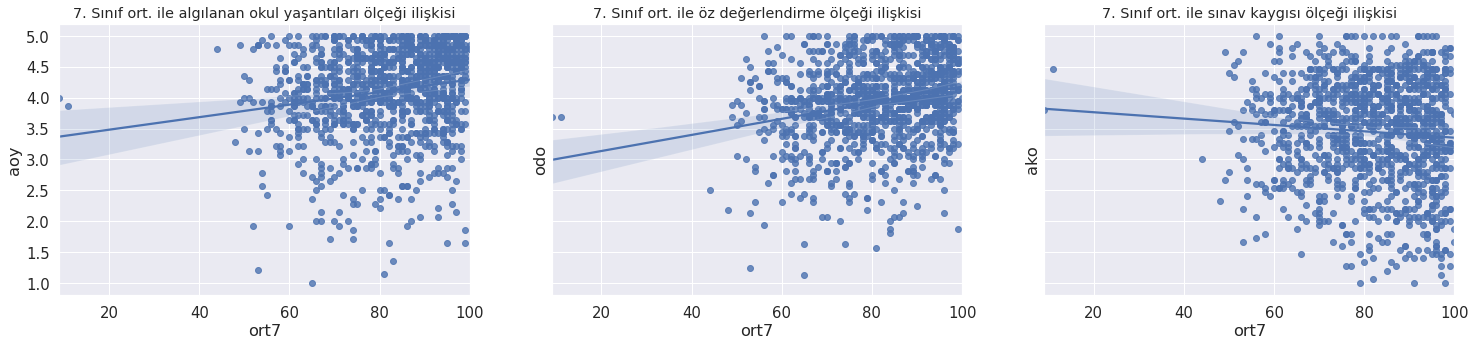

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(25,5), sharey=True)
#fig.suptitle('Tutum Ölçekleri ile 7. Sınıf Ortalaması İlişkileri')
sns.set(font_scale=1.2)
sns.regplot(ax=axes[0],x=df_total.ort7, y=df_total.aoy, ci=100).set_title("7. Sınıf ort. ile algılanan okul yaşantıları ölçeği ilişkisi");
#axes[0].set_title('Title of the first chart')
sns.regplot(ax=axes[1], x=df_total.ort7, y=df_total.odo, ci=100).set_title("7. Sınıf ort. ile öz değerlendirme ölçeği ilişkisi");
sns.regplot(ax=axes[2],x=df_total.ort7, y=df_total.ako, ci=100).set_title("7. Sınıf ort. ile sınav kaygısı ölçeği ilişkisi");
plt.savefig("tutum_regresyon.png");

Buradan elde edilen sonuçlara göre; 

*   Algılanan okul yaşantıları ölçeği ortalaması yükseldikçe 7. sınıf ortalamasının yükseldiği,   
*   Öz değerlendirme ölçeği ortalaması yükseldikçe 7. sınıf ortalamasının yükseldiği,
*   Sınav kaygısı ölçeği ortalaması ile 7. sınıf not ortalamasının doğrusal bir ilişkisi olmadığı

sonuçlarına varılmıştır.




## Korelasyon Analizi

In [ ]:
x_reduced_col_names = df_total.corr().abs()["ort7"].nlargest(10).index
df_total[x_reduced_col_names].corr()

,ort7,ort6,ort5,ders_calisma,Bogrenim,Aogrenim,odo,ozel_kurs,gelir,aoy
ort7,1.000000,0.909238,0.843153,0.374718,0.333300,0.320489,0.244769,0.235556,0.225700,0.178430
ort6,0.909238,1.000000,0.912723,0.364994,0.355567,0.347004,0.231056,0.241577,0.272485,0.152547
ort5,0.843153,0.912723,1.000000,0.327255,0.328829,0.306146,0.218516,0.211915,0.248373,0.149990
ders_calisma,0.374718,0.364994,0.327255,1.000000,0.169126,0.188828,0.272471,0.248800,0.123214,0.229050
Bogrenim,0.333300,0.355567,0.328829,0.169126,1.000000,0.471159,0.034490,0.199666,0.400929,0.013907
Aogrenim,0.320489,0.347004,0.306146,0.188828,0.471159,1.000000,0.016609,0.215348,0.362621,-0.048096
odo,0.244769,0.231056,0.218516,0.272471,0.034490,0.016609,1.000000,0.016148,0.020727,0.658925
ozel_kurs,0.235556,0.241577,0.211915,0.248800,0.199666,0.215348,0.016148,1.000000,0.225053,-0.024964
gelir,0.225700,0.272485,0.248373,0.123214,0.400929,0.362621,0.020727,0.225053,1.000000,-0.025403
aoy,0.178430,0.152547,0.149990,0.229050,0.013907,-0.048096,0.658925,-0.024964,-0.025403,1.000000


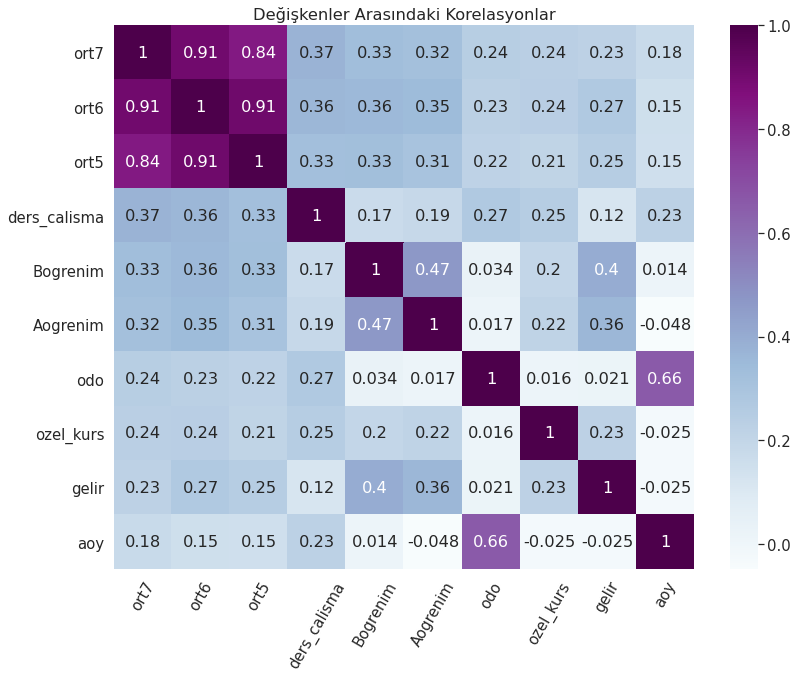

In [ ]:
plt.figure(figsize=(13,10))
correlation=df_total[x_reduced_col_names].corr()
sns.set(font_scale=1.35)
plt.xticks(rotation=60)
sns.heatmap(correlation, annot=True,cmap="BuPu");
plt.title("Değişkenler Arasındaki Korelasyonlar");

# Makine Öğrenmesi

## Regresyon

In [ ]:
x = df_total
y = df_total.ort7

x = x[x_reduced_col_names]
x.dtypes

ort7              int64
ort6              int64
ort5              int64
ders_calisma      int64
Bogrenim          int64
Aogrenim          int64
odo             float64
ozel_kurs         int64
gelir             int64
aoy             float64
dtype: object

In [ ]:
x = x.drop("ort7", axis=1)
y = df_total.ort7

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=42)

#XGBoost

Structured veriler için en doğru sonuçları veren modelleme tekniği.

In [ ]:
XGB_model = XGBRegressor()

In [ ]:
XGB_model.fit(train_x, train_y)

[15:39:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
predictions = XGB_model.predict(val_x)
print('Eğitim doğruluğu :',XGB_model.score(train_x,train_y)*100)
print('Test doğruluğu :',XGB_model.score(val_x,val_y)*100)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, val_y)))

Eğitim doğruluğu : 88.17620785015156
Test doğruluğu : 81.52055855568618
Mean Absolute Error: 3.536870070635262


In [ ]:
val_predictions = XGB_model.predict(val_x)

pred = val_predictions[-10:].astype("int64")
org = val_y[-10:].values
df_pred = pd.DataFrame({"preds" : pred, "labels":org})
df_pred

,preds,labels
0,93,89
1,98,98
2,79,76
3,79,75
4,82,81
5,83,80
6,86,79
7,75,76
8,88,86
9,92,92




---

# Classification

In [ ]:
def puan_olcegi(ort):
  for i in df_total[ort].index:
    if df_total[ort][i] >=0 and df_total[ort][i] <= 24:
      df_total[ort][i] = 0
    elif df_total[ort][i] >=25 and df_total[ort][i] <= 44:
      df_total[ort][i] = 1
    elif df_total[ort][i] >= 45 and df_total[ort][i] <=54:
      df_total[ort][i] = 2
    elif df_total[ort][i] >= 55 and df_total[ort][i] <=69:
      df_total[ort][i] = 3
    elif df_total[ort][i] >= 70 and df_total[ort][i] <=84:
      df_total[ort][i] = 4
    elif df_total[ort][i] >= 85 and df_total[ort][i] <=100:
      df_total[ort][i] = 5

In [ ]:
puan_olcegi(ort = "ort5")
puan_olcegi(ort = "ort6")
puan_olcegi(ort = "ort7")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-p

In [ ]:
df_total

,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ort5,ort6,ort7,aoy,odo,ako
0,1,1,1,1,1,1,1,5,4,0,1,3,3,1,0,1,5,2,2,2,2,1,1,0,5,5,5,4.357143,3.9375,3.800000
1,1,1,1,1,1,1,1,2,4,0,1,2,3,1,0,3,3,3,2,2,2,1,1,1,5,5,5,4.500000,3.1875,2.466667
2,1,1,1,1,1,1,1,4,2,0,1,3,3,1,0,2,1,0,4,3,2,0,1,1,5,5,5,3.785714,3.0000,3.000000
3,1,1,1,1,1,1,1,2,4,0,1,4,4,1,0,4,3,3,1,4,4,0,0,1,3,3,3,4.071429,4.3125,2.533333
4,1,1,1,1,1,1,1,2,2,0,1,4,2,0,0,4,4,2,1,4,1,1,0,0,5,5,5,3.785714,4.0625,3.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,0,1,1,1,1,1,1,2,4,0,1,3,3,0,0,3,1,2,4,1,3,1,0,1,5,5,5,5.000000,4.8750,3.666667
1176,1,1,1,1,1,1,1,4,3,0,1,3,3,0,0,4,2,3,3,2,4,1,0,1,5,5,5,3.428571,4.0625,4.200000
1177,0,1,1,1,1,1,1,2,3,0,1,3,3,1,0,3,3,1,1,1,3,0,0,1,5,5,5,4.500000,4.4375,4.133333
1178,1,1,1,1,1,1,1,4,3,0,1,2,4,1,0,3,1,1,3,1,3,1,0,0,5,5,5,3.928571,3.7500,3.533333


In [ ]:
x_cl = df_total #degiskenler
y_cl = df_total.ort7 #tahmin edilecek

In [ ]:
x_cl.head()

,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ort5,ort6,ort7,aoy,odo,ako
0,1,1,1,1,1,1,1,5,4,0,1,3,3,1,0,1,5,2,2,2,2,1,1,0,5,5,5,4.357143,3.9375,3.800000
1,1,1,1,1,1,1,1,2,4,0,1,2,3,1,0,3,3,3,2,2,2,1,1,1,5,5,5,4.500000,3.1875,2.466667
2,1,1,1,1,1,1,1,4,2,0,1,3,3,1,0,2,1,0,4,3,2,0,1,1,5,5,5,3.785714,3.0000,3.000000
3,1,1,1,1,1,1,1,2,4,0,1,4,4,1,0,4,3,3,1,4,4,0,0,1,3,3,3,4.071429,4.3125,2.533333
4,1,1,1,1,1,1,1,2,2,0,1,4,2,0,0,4,4,2,1,4,1,1,0,0,5,5,5,3.785714,4.0625,3.066667


In [ ]:
x_cl_reduced_col_names = x_cl.corr().abs()["ort7"].nlargest(10).index
x_cl[x_cl_reduced_col_names].corr()

,ort7,ort6,ort5,ders_calisma,Bogrenim,Aogrenim,odo,ozel_kurs,gelir,aoy
ort7,1.000000,0.819369,0.746047,0.326606,0.297170,0.293353,0.231574,0.210225,0.187907,0.180444
ort6,0.819369,1.000000,0.816771,0.345503,0.315361,0.312748,0.216400,0.231996,0.236522,0.150753
ort5,0.746047,0.816771,1.000000,0.281535,0.276753,0.247451,0.187711,0.173471,0.220667,0.107251
ders_calisma,0.326606,0.345503,0.281535,1.000000,0.169126,0.188828,0.272471,0.248800,0.123214,0.229050
Bogrenim,0.297170,0.315361,0.276753,0.169126,1.000000,0.471159,0.034490,0.199666,0.400929,0.013907
Aogrenim,0.293353,0.312748,0.247451,0.188828,0.471159,1.000000,0.016609,0.215348,0.362621,-0.048096
odo,0.231574,0.216400,0.187711,0.272471,0.034490,0.016609,1.000000,0.016148,0.020727,0.658925
ozel_kurs,0.210225,0.231996,0.173471,0.248800,0.199666,0.215348,0.016148,1.000000,0.225053,-0.024964
gelir,0.187907,0.236522,0.220667,0.123214,0.400929,0.362621,0.020727,0.225053,1.000000,-0.025403
aoy,0.180444,0.150753,0.107251,0.229050,0.013907,-0.048096,0.658925,-0.024964,-0.025403,1.000000


In [ ]:
x_cl = x_cl[x_cl_reduced_col_names]
x_cl.dtypes

ort7              int64
ort6              int64
ort5              int64
ders_calisma      int64
Bogrenim          int64
Aogrenim          int64
odo             float64
ozel_kurs         int64
gelir             int64
aoy             float64
dtype: object

## Split Data

In [ ]:
x_cl = x_cl.drop("ort7", axis=1)
y_cl = df_total.ort7

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(x_cl, y_cl, random_state=42)

##Specify and Fit the Model

### Support Vector Machine (SVM)

SVM sınıfları (özellikleri) bir hiper düzlemle bölen makine öğrenmesi algoritmasıdır.

In [ ]:
ort_svm = svm.SVC(kernel = "poly")
ort_svm.fit(train_x,train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svm_predict = ort_svm.predict(val_x)
valy = np.array(val_y)
svm_accuracy = accuracy_score(valy,svm_predict)
svm_accuracy = svm_accuracy*100
print("SVM Accuracy for ort dataset : %",svm_accuracy)

SVM Accuracy for ort dataset : % 80.67796610169492


### SVM Modelinin Sonuçlarının İncelenmesi

In [ ]:
val_predictions = ort_svm.predict(val_x)

print(val_predictions[:5], "\n")

print(val_y.head())

[5 4 3 3 5] 

210    5
58     4
943    3
584    3
218    5
Name: ort7, dtype: int64


In [ ]:
pred = val_predictions[-10:].astype("int64")
org = val_y[-10:].values
df_pred = pd.DataFrame({"preds" : pred, "labels":org})
df_pred

,preds,labels
0,5,5
1,5,5
2,4,4
3,4,4
4,4,4
5,5,4
6,5,4
7,4,4
8,5,5
9,5,5
